#### Librerias:

In [169]:
import numpy as np
from pyswarm import pso
import math
import matplotlib.pyplot as plt

#### Función a maximizar:

In [170]:
# funcion objetivo
def funcion_objetivo(x, y):
    
    return np.exp(-0.1 * (x ** 2 + y ** 2)) * np.cos(x) * np.sin(y)

#### Parametros algoritmo:

In [171]:
# parametros
num_particulas = 20  # numero de particulas
dim = 2  # dimensiones
cantidad_iteraciones = 15  # maximo numero de iteraciones
c1 = 1.49  # componente cognitivo
c2 = 1.49  # componente social
w = 0  # factor de inercia
limite_inf = -50 # limite inferior de busqueda
limite_sup = 50 # limite superior de busqueda

#### Inicizalizaciones:

In [172]:
# inicializacion
particulas = np.random.uniform(limite_inf, limite_sup, (num_particulas, dim))  # posiciones iniciales de las particulas

velocidades = np.zeros((num_particulas, dim))  # inicializacion de la matriz de velocidades en cero

# inicializacion de pbest y gbest
pbest = particulas.copy()  # mejores posiciones personales iniciales

fitness_pbest = np.empty(num_particulas)  # mejores fitness personales iniciales
for i in range(num_particulas):
    fitness_pbest[i] = funcion_objetivo(particulas[i][0], particulas[i][1])

# cambiando por np.argmin y por np.min creo que tenemos un problema de minimización
gbest = pbest[np.argmax(fitness_pbest)]  # mejor posicion global inicial
fitness_gbest = np.max(fitness_pbest)  # fitness global inicial

#### Realizamos la busqueda, aplicamos el algoritmo PSO:

In [173]:
# busqueda
for iteracion in range(cantidad_iteraciones):
    for i in range(num_particulas):  # iteracion sobre cada partícula
        r1, r2 = np.random.rand(), np.random.rand()  # generacion dos numeros aleatorios

        # actualizacion de la velocidad de la particula en cada dimension
        for d in range(dim):
            velocidades[i][d] = (w * velocidades[i][d] + c1 * r1 * (pbest[i][d] - particulas[i][d]) + c2 * r2 * (gbest[d] - particulas[i][d]))

        for d in range(dim):
            particulas[i][d] = particulas[i][d] + velocidades[i][d]  # cctualizacion de la posicion de la particula en cada dimension

            # mantenimiento de las partículas dentro de los limites
            particulas[i][d] = np.clip(particulas[i][d], limite_inf, limite_sup)

        fitness = funcion_objetivo(particulas[i][0], particulas[i][1])  # Evaluacion de la funcion objetivo para la nueva posicion

        # actualizacion el mejor personal
        if fitness > fitness_pbest[i]:
            fitness_pbest[i] = fitness  # actualizacion del mejor fitness personal
            pbest[i] = particulas[i].copy()  # actualizacion de la mejor posicion personal

            # actualizacion del mejor global
            if fitness > fitness_gbest:
                fitness_gbest = fitness  # actualizacion del mejor fitness global
                gbest = particulas[i].copy()  # actualizacion de la mejor posicion global

    # imprimir el mejor global en cada iteracion
    print(f"Iteración {iteracion + 1}: Mejor posición global {gbest}, Valor {fitness_gbest}")

Iteración 1: Mejor posición global [2.58197753 3.32920726], Valor 0.026788731199565614
Iteración 2: Mejor posición global [3.43699452 4.74333519], Valor 0.030931636843171184
Iteración 3: Mejor posición global [2.79740371 3.90917589], Valor 0.06483803087593547
Iteración 4: Mejor posición global [0.05118641 1.91522155], Valor 0.6512214350534851
Iteración 5: Mejor posición global [0.17606383 1.45233318], Valor 0.7892751985485219
Iteración 6: Mejor posición global [-0.00247483  1.34714296], Valor 0.8132596598557098
Iteración 7: Mejor posición global [0.00620388 1.34535607], Valor 0.8133032342442108
Iteración 8: Mejor posición global [0.01248215 1.31632345], Valor 0.8137532799590119
Iteración 9: Mejor posición global [-6.65840505e-04  1.31046415e+00], Valor 0.8138264498733834
Iteración 10: Mejor posición global [1.51878527e-04 1.31542023e+00], Valor 0.8138312421422998
Iteración 11: Mejor posición global [1.51878527e-04 1.31542023e+00], Valor 0.8138312421422998
Iteración 12: Mejor posición g

In [168]:
# resultado
solucion_optima = gbest  # mejor posicion global final
valor_optimo = fitness_gbest  # mejor fitness global final

print("Valor optimo:", valor_optimo)
print("La solucion optima ocurre en [x, y] = ", solucion_optima)

Valor optimo: 0.8138312170947425
La solucion optima ocurre en [x, y] =  [-2.90077332e-04  1.31541730e+00]


Máximo valor encontrado: 0.8138325463303111  
Posición del máximo: x = 0.0, y = 1.3138392572451694  
Lo calcule con una pagina web, solo lo uso para comparar con lo que obtengo.

#### Punto c: grafico.

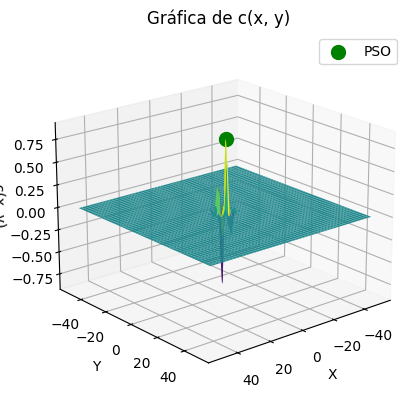

In [174]:
# Define la función c(x, y)
def c(x, y):
    return np.exp(-0.1 * (x ** 2 + y ** 2)) * np.cos(x) * np.sin(y)

# Intervalos de las variables independientes
x = np.linspace(-50, 50, 500)
y = np.linspace(-50, 50, 500)
X, Y = np.meshgrid(x, y)
Z = c(X, Y)

# Configuración de la gráfica
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Agrega los puntos de máximo en rojo
# Suponiendo que este es el punto de minimo encontrado por tu algoritmo
x_min = -2.90077332e-04
y_min = 1.31541730e+00
z_min = 0.8138312170947425

# Agrega los puntos a la gráfica
ax.scatter(x_min, y_min, z_min, color='green', label='PSO', s=100)

# Etiquetas y título
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('c(x, y)')
ax.set_title('Gráfica de c(x, y)')
ax.legend()

# Rotar el gráfico antes de mostrarlo
ax.view_init(elev=20, azim=50)  # Ajusta estos valores para cambiar la vista

# Muestra la gráfica
plt.show()

#### Punto d: grafico gbest.

In [175]:
gbest_list =[[2.58197753, 3.32920726],          
[3.43699452, 4.74333519],          
[2.79740371, 3.90917589],          
[0.05118641, 1.91522155],          
[0.17606383, 1.45233318],          
[-0.00247483,  1.34714296],        
[0.00620388, 1.34535607],          
[0.01248215, 1.31632345],          
[-6.65840505e-04,  1.31046415e+00],
[1.51878527e-04, 1.31542023e+00],  
[1.51878527e-04, 1.31542023e+00],  
[1.84445165e-04, 1.31537031e+00],  
[-3.55272394e-04,  1.31523608e+00],
[1.05924771e-03, 1.31432540e+00],  
[4.96998138e-04, 1.31467249e+00],  ] 

gbest_x_list = [g[0] for g in gbest_list]
gbest_y_list = [g[1] for g in gbest_list]

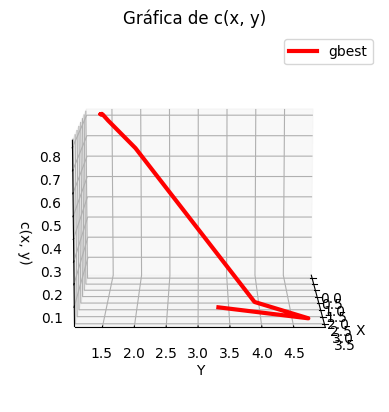

In [177]:
# Define la función c(x, y)
def c(x, y):
    return np.exp(-0.1 * (x ** 2 + y ** 2)) * np.cos(x) * np.sin(y)

# Intervalos de las variables independientes
x = np.linspace(-100, 100, 1000)
y = np.linspace(-100, 100, 1000)
X, Y = np.meshgrid(x, y)
Z = c(X, Y)

# Configuración de la gráfica
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Agrega los puntos de máximo en rojo
# Suponiendo que este es el punto de minimo encontrado por tu algoritmo
gbest_z_list = [c(g[0], g[1]) for g in gbest_list]

# Agrega los puntos a la gráfica
ax.plot(gbest_x_list, gbest_y_list, gbest_z_list, color='red', label='gbest', lw=3)

# Etiquetas y título
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('c(x, y)')
ax.set_title('Gráfica de c(x, y)')
ax.legend()

# Rotar el gráfico antes de mostrarlo
ax.view_init(elev=10, azim=0)  # Ajusta estos valores para cambiar la vista

# Muestra la gráfica
plt.show()

#### Punto f: grafico de boxplots:

Un boxplot se utiliza para visualizar la distribución de un conjunto de datos. Muestra la mediana, los cuartiles y los valores atípicos de los datos, lo que permite identificar características clave de la distribución y detectar posibles anomalías.

In [127]:
# Estas listas se obtuvieron ejecutando uno a uno el algoritmo

fitness_w0_list = [0.012461897890254349,0.5187117614570824,0.7423913409155702,0.7917969366510014,0.7961495135256332,0.7994071778622553,0.8023832035012199,0.813829205370938,0.8138294047553905,0.8138295934542187,0.813829813222432,0.8138298726244234,0.8138298824349007,0.8138301873786238,0.8138312196785596]
x_w0_list = [6.30676111,     2.04954017e-03 ,0.15943161     ,-0.02775691    ,-0.07302162    ,-0.08555609    ,-0.09676095    ,1.02602350e-03 ,0.00243569     ,0.00226828     ,0.001838       ,0.00198526     ,0.00199584     ,0.00136116     ,-3.01133069e-04]
y_w0_list = [1.88750033 ,   2.16469110e+00,1.66711596    ,1.5225806     ,1.48762999    ,1.46098135    ,1.43075534    ,1.31617785e+00,1.31452614    ,1.31476142    ,1.3152864     ,1.31504232    ,1.31501764    ,1.31551606    ,1.31541375e+00]

fitness_w05_list = [0.12283730586741777, 0.2303637546075162, 0.2303637546075162, 0.27692867056407683, 0.27692867056407683, 0.27692867056407683, 0.8015267842424052, 0.8015267842424052, 0.8015267842424052, 0.8015267842424052, 0.8015267842424052, 0.8015267842424052, 0.8015267842424052, 0.8015267842424052, 0.8015267842424052]
x_w05_list = [-0.55663567, -3.14911733, -3.14911733, -3.17454029, -3.17454029, -3.17454029, 0.15844271 , 0.15844271 , 0.15844271 , 0.15844271 , 0.15844271 , 0.15844271 , 0.15844271 , 0.15844271 , 0.15844271 ]
y_w05_list = [-4.20288066, -1.97778185, -1.97778185, -1.6507124 , -1.6507124 , -1.6507124 , 1.30004784 , 1.30004784 , 1.30004784 , 1.30004784 , 1.30004784 , 1.30004784 , 1.30004784 , 1.30004784 , 1.30004784 ]


fitness_w08_list = [0.08012347933259525, 0.5986529499928741, 0.5986529499928741, 0.5986529499928741, 0.7000410393434926, 0.8045337940891756, 0.8045337940891756, 0.8045337940891756, 0.8045337940891756, 0.8045337940891756, 0.8045337940891756, 0.8045337940891756, 0.8045337940891756, 0.8045337940891756, 0.8045337940891756]
x_w08_list = [1.37240747 , 0.3817244  , 0.3817244  , 0.3817244  , 0.47981429 , -0.11530848, -0.11530848, -0.11530848, -0.11530848, -0.11530848, -0.11530848, -0.11530848, -0.11530848, -0.11530848, -0.11530848]
y_w08_list = [2.21285961, 0.76738428, 0.76738428, 0.76738428, 1.20414955, 1.24001228, 1.24001228, 1.24001228, 1.24001228, 1.24001228, 1.24001228, 1.24001228, 1.24001228, 1.24001228, 1.24001228]

C:\Users\franco\AppData\Local\Temp\ipykernel_10796\1367167374.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([fitness_w0_list, fitness_w05_list, fitness_w08_list], labels=['W=0', 'W=0.5', 'W=0.8'])


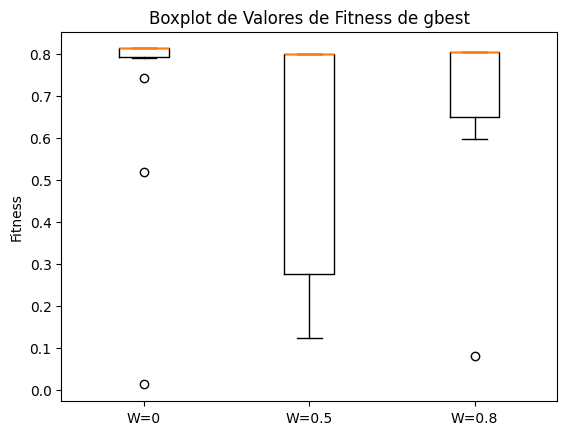

In [130]:
# Crear el boxplot
plt.boxplot([fitness_w0_list, fitness_w05_list, fitness_w08_list], labels=['W=0', 'W=0.5', 'W=0.8'])

# Agregar título y etiquetas
plt.title('Boxplot de Valores de Fitness de gbest')
plt.ylabel('Fitness')

# Mostrar el gráfico
plt.show()

C:\Users\franco\AppData\Local\Temp\ipykernel_10796\4258482374.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([x_w0_list, x_w05_list, x_w08_list], labels=['W=0', 'W=0.5', 'W=0.8'])


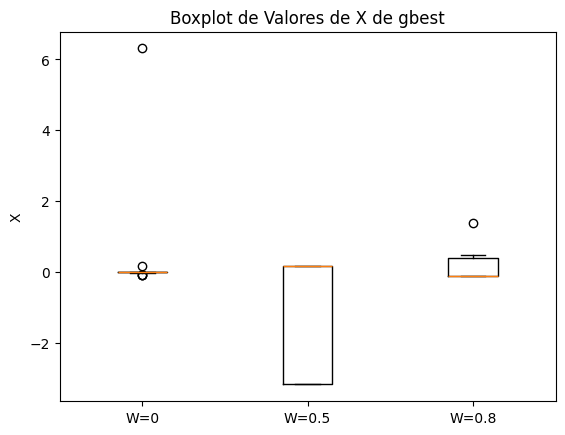

In [131]:
# Crear el boxplot
plt.boxplot([x_w0_list, x_w05_list, x_w08_list], labels=['W=0', 'W=0.5', 'W=0.8'])

# Agregar título y etiquetas
plt.title('Boxplot de Valores de X de gbest')
plt.ylabel('X')

# Mostrar el gráfico
plt.show()

C:\Users\franco\AppData\Local\Temp\ipykernel_10796\1164695957.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([y_w0_list, y_w05_list, y_w08_list], labels=['W=0', 'W=0.5', 'W=0.8'])


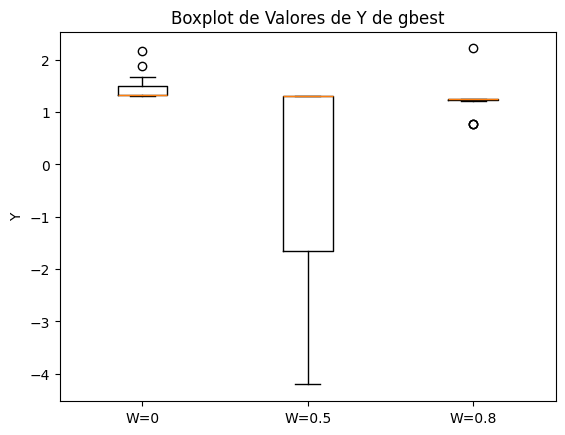

In [133]:
# Crear el boxplot
plt.boxplot([y_w0_list, y_w05_list, y_w08_list], labels=['W=0', 'W=0.5', 'W=0.8'])

# Agregar título y etiquetas
plt.title('Boxplot de Valores de Y de gbest')
plt.ylabel('Y')

# Mostrar el gráfico
plt.show()